<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Test" data-toc-modified-id="Test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Test</a></span><ul class="toc-item"><li><span><a href="#H" data-toc-modified-id="H-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>H</a></span><ul class="toc-item"><li><span><a href="#rvs1-=-stats.norm.rvs(size=n1,-loc=0.,-scale=1,-random_state=rng)" data-toc-modified-id="rvs1-=-stats.norm.rvs(size=n1,-loc=0.,-scale=1,-random_state=rng)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1, random_state=rng)</a></span></li></ul></li></ul></li></ul></div>

In [ ]:
%reload_ext watermark
%reload_ext autoreload
%autoreload 2
%watermark -p numpy,sklearn,pandas
%watermark -p cv2,PIL,matplotlib
%watermark -p torch,torchvision,torchaudio
%watermark -p tensorflow,tensorboard
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.use_jedi = False

from IPython.display import display, Markdown, HTML, Image, Javascript
from IPython.core.magic import register_line_cell_magic, register_line_magic, register_cell_magic
display(HTML('<style>.container { width:%d%% !important; }</style>' % 90))

import sys, os, io, time, random, math
import json, base64, requests
import os.path as osp
import numpy as np

def _IMPORT_(x):
    try:
        segs = x.split(' ')
        g = globals()
        if 'github.com' in segs[1]:
            uri = segs[1].replace('github.com', 'raw.githubusercontent.com')
            mod = uri.split('/')
            for s in ['main', 'master']:
                uri = 'https://' + '/'.join(mod[:-1]) + '/main/' + mod[-1] + '.py'
                x = requests.get(uri)
                if x.status_code == 200:
                    x = x.text
                    break
        elif 'gitee.com' in segs[1]:
            mod = segs[1].split('/')
            for s in ['/raw/main/', '/raw/master/']:
                uri = 'https://' + '/'.join(mod[:3]) + s + '/'.join(mod[3:]) + '.py'
                x = requests.get(uri)
                if x.status_code == 200:
                    x = x.text
                    break
        elif segs[1][0] == '/':
            with open(segs[1] + '.py') as fr:
                x = fr.read()
        exec(x, g)
    except:
        pass


In [1]:

import logging
def get_logger(name, level=logging.DEBUG, filepath=None, console=True):
    logger = logging.getLogger(name)
    logger.setLevel(level)
    formatter = logging.Formatter('%(asctime)s - %(filename)s - %(funcName)s:%(lineno)d - %(name)s - %(levelname)s - %(message)s')
    if console:
        console = logging.StreamHandler()
        console.setLevel(level)
        console.setFormatter(formatter)
        logger.addHandler(console)
    if filepath:
        filelog = logging.FileHandler(filepath)
        filelog.setLevel(level)
        filelog.setFormatter(formatter)
        logger.addHandler(filelog)
    return logger

## Test

### H

In [9]:
view_center[0]

TypeError: 'List' object does not support indexing

In [4]:
import traitlets

view_center = traitlets.List((0.5, 0.5))

In [3]:
logger.debug('11')

2021-11-05 20:11:02,625 - <ipython-input-3-4b7222c24a96> - <module>:1 - JetRep - DEBUG - 11


In [38]:
from traitlets import Int, Float, Unicode, Tuple, List, Dict
from traitlets.config.configurable import LoggingConfigurable
import traitlets

class A(LoggingConfigurable):
    latest_sorting = Dict(default_value={"field": None, "order": 'test'})
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    @traitlets.observe('latest_sorting')
    def _update_latest_sorting(self, change):
        print(change)

In [40]:
test = A()

In [41]:
test.latest_sorting =  {"field": None, "order": 'test'}

{'name': 'latest_sorting', 'old': traitlets.Undefined, 'new': {'field': None, 'order': 'test'}, 'owner': <__main__.A object at 0x7fedd082e550>, 'type': 'change'}


In [44]:
test.latest_sorting =  {"field": None, "order": 'aaa'}

{'name': 'latest_sorting', 'old': {'field': None, 'order': 'test'}, 'new': {'field': None, 'order': 'aaa'}, 'owner': <__main__.A object at 0x7fedd082e550>, 'type': 'change'}


In [50]:
a = {"field":'11', "order": 'aaa'}

In [51]:
a.get('field', 'none')

'11'

In [43]:
type(test.latest_sorting)

dict

In [52]:
class DotDict(dict):
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

    def __init__(self, *args, **kwargs):
        for arg in args:
            if isinstance(arg, dict):
                for k, v in arg.items():
                    self[k] = v
        if kwargs:
            for k, v in kwargs.items():
                self[k] = v

    def __getstate__(self):
        return self.__dict__

    def __setstate__(self, d):
        self.__dict__.update(d)

In [54]:
a = {'a': 10, 'b': 'h'}
b = DotDict(a)

In [55]:
b.a

10

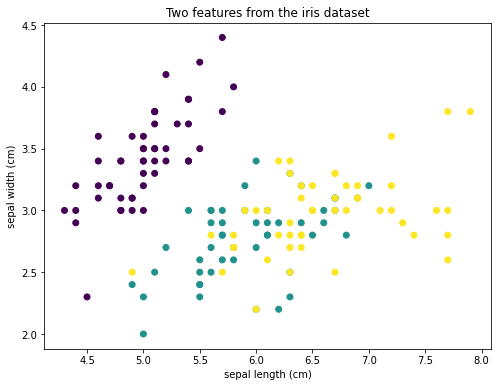

Principal components:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


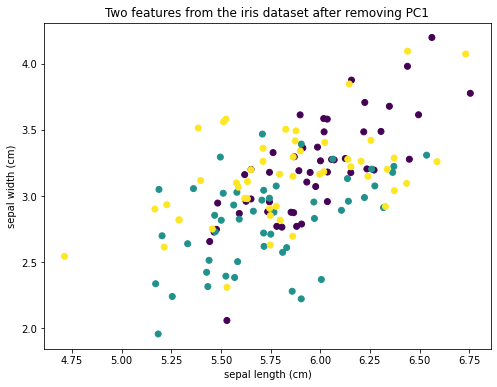

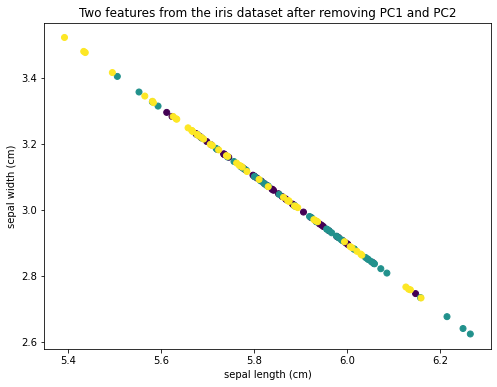

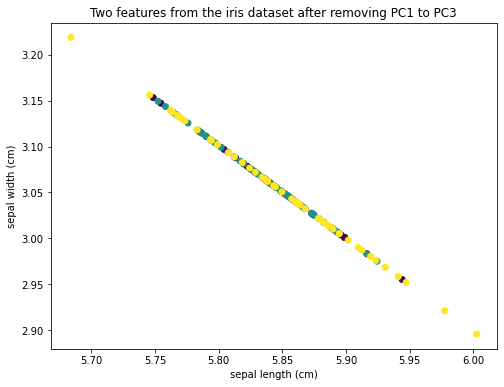

Explainedd variance ratios:
[0.92461872 0.05306648 0.01710261 0.00521218]
Using all features, accuracy:  0.98
Using all features, F1:  0.9818399044205496
Using PC1, accuracy:  0.92
Using PC1, F1:  0.9265700483091788


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load iris dataset
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset")
plt.show()

# Show the principal components
pca = PCA().fit(X)
print("Principal components:")
print(pca.components_)

# Remove PC1
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[0]
pc1 = value.reshape(-1,1) @ pca.components_[0].reshape(1,-1)
Xremove = X - pc1
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1")
plt.show()

# Remove PC2
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[1]
pc2 = value.reshape(-1,1) @ pca.components_[1].reshape(1,-1)
Xremove = Xremove - pc2
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1 and PC2")
plt.show()

# Remove PC3
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[2]
pc3 = value.reshape(-1,1) @ pca.components_[2].reshape(1,-1)
Xremove = Xremove - pc3
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1 to PC3")
plt.show()

# Print the explained variance ratio
print("Explainedd variance ratios:")
print(pca.explained_variance_ratio_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Run classifer on all features
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using all features, accuracy: ", clf.score(X_test, y_test))
print("Using all features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))

# Run classifier on PC1
mean = X_train.mean(axis=0)
X_train2 = X_train - mean
X_train2 = (X_train2 @ pca.components_[0]).reshape(-1,1)
clf = SVC(kernel="linear", gamma='auto').fit(X_train2, y_train)
X_test2 = X_test - mean
X_test2 = (X_test2 @ pca.components_[0]).reshape(-1,1)
print("Using PC1, accuracy: ", clf.score(X_test2, y_test))
print("Using PC1, F1: ", f1_score(y_test, clf.predict(X_test2), average="macro"))

In [5]:
import numpy as np
from scipy import stats
rng = np.random.default_rng()

In [2]:
n1 = 200  # size of first sample
n2 = 300  # size of second sample

In [23]:
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1, random_state=rng)
rvs2 = stats.norm.rvs(size=n1, loc=0.2, scale=1, random_state=rng)
stats.ks_2samp(rvs1, rvs2)

KstestResult(statistic=0.14, pvalue=0.03956202584899502)

In [25]:
rvs1.shape

(200,)